# Ch05 트리 알고리즘
# Ch05-1 결정 트리



In [31]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [32]:
#데이터 확인
wine.head( )

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


class 0 : 레드 와인  
class 1 : 화이트 와인  

### pandas의 `info()` 
데이터 프레임에서 각 열의 데이터 타입과 데이터 누락 여부 확인하는 용도


In [33]:
wine.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


총 6497개 샘플. 4개 열 모두 실수  
non-null도 6497개이므로 누락된 컬럼 없음  

* 만약 누락이 있다면?  
- 데이터 버리기
- 평균 값으로 채운 후 사용하기 
-------------------------------

### pandas의 `describe() `
열에 대한 간략한 통계 출력
최소, 최대, 평균값 등  


In [34]:
wine.describe( )

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


- mean : 평균
- std : 표준편차
- min : 최소
- 25% : 1/4분위수
- 50% : 중위값
- 75% : 3/4
- max : 최대  


> 알코올 도수, 당도, pH값의 스케일이 다르므로 standardscaler 클래스를 이용해 표준화 처리해야한다.  
> 그러나 그 전에 특성과 타깃을 추출하고 훈련 세트와 테스트 세트로 나누기.  
처음 3개 열을 data에 저장하고, 마지막 class열을 target에 저장하기.  

In [35]:
data = wine[['alcohol', 'sugar', 'pH']] #독립 변수 데이터 설정
target = wine['class'] #종속 변수 데이터 설정

In [36]:
from sklearn.model_selection import train_test_split 
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42) #데이터 셋 분할


* train_test_split() 함수는 설정값을 지정하지 않으면 25%를 테스트 세트로 지정.  
따라서, test_size=0.2로 하면 20%만 테스트 세트로 지정한 것.  
- 샘플 개수가 충분히 많아서 20%만 해도 충분.

In [37]:
print(train_input.shape, test_input.shape) # 만들어진 훈련 세트와 테스트 세트의 크기 출력

(5197, 3) (1300, 3)


In [38]:
#StandardScaler를 사용한 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input) #훈련 세트로 StandardScaler 객체를 만듦
train_scaled = ss.transform(train_input) #훈련 세트 변환
test_scaled = ss.transform(test_input) #테스트 세트 변환


In [39]:
# 표준점수로 변환된 trained_scaled, test_scaled를 이용하여 로지스틱 회귀 모델 훈련  및 점수 출력
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target) #로지스틱 회귀 모델 훈련
print(lr.score(train_scaled, train_target)) #훈련 세트 점수 출력
print(lr.score(test_scaled, test_target)) #테스트 세트 점수 출력

0.7808350971714451
0.7776923076923077


>훈련 세트와 테스트 세트 모두 점수가 낮음. 
과소적합?

규제 매개 변수 C의 값을 바꾼다? 

---------------------------------
### 설명하기 쉬운 모델과 어려운 모델

In [40]:
# 로지스틱 회귀가 학습한 계수와 절편 출력
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


중간 보고서 작성
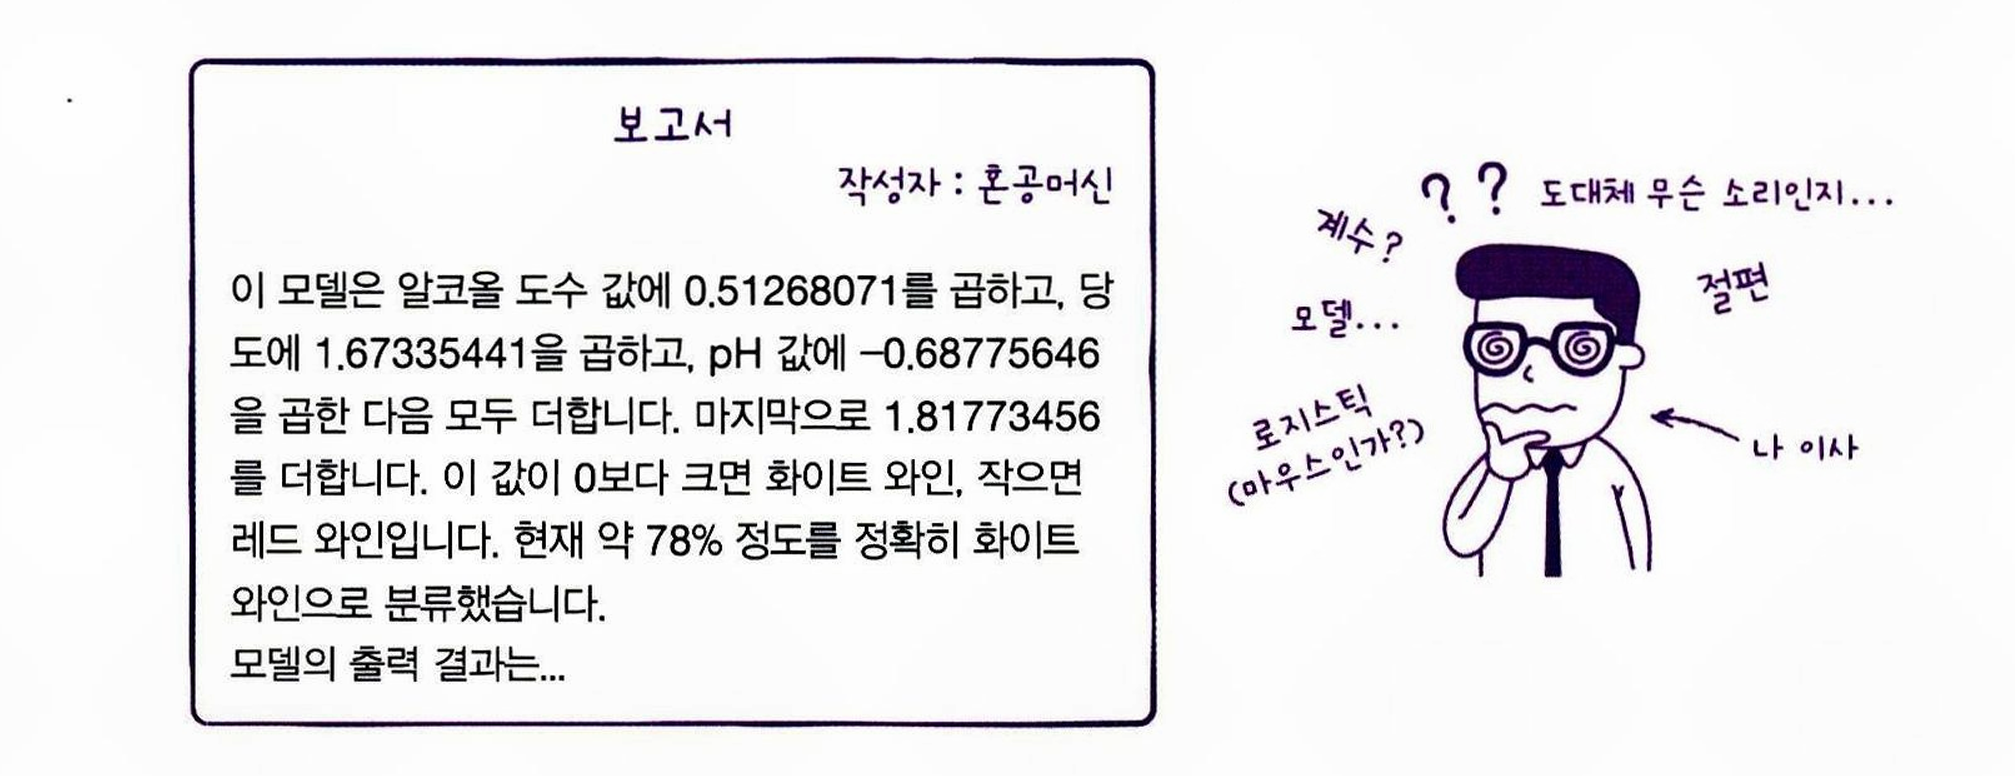

??

-------------
## 1. 결정 트리 Decision Tree 

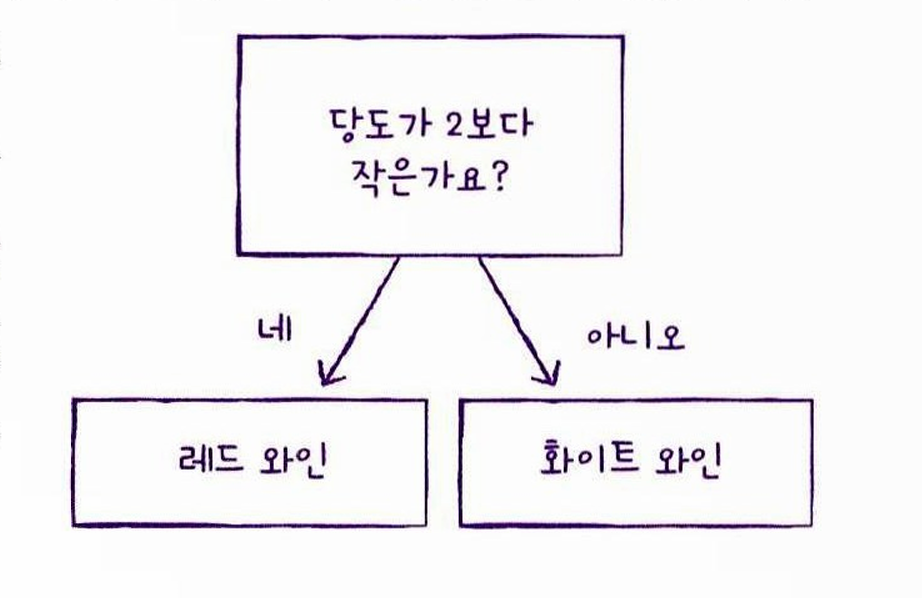

### DecisionTreeClassifier 클래스 @사이킷런

`fit()`  `score()`

In [44]:
#결정트리 모델 훈련 및 점수 출력
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target) #결정트리 모델 훈련
print(dt.score(train_scaled, train_target)) #훈련 세트 점수 출력 꼭 표준화 한 데이터 넣어야함!!!!! (train_scaled)
print(dt.score(test_scaled, test_target)) #테스트 세트 점수 출력

0.996921300750433
0.8592307692307692


훈련 세트 점수는 좋으나, 테스트 세트 점수가 낮음 = 과대 적합


------------------

### `plot_tree()` 함수 @matplotlib
결정 트리 그림 그리는 함수

* `plot_tree()` = 그림의 내용을 정하는 함수, 무엇을 그릴 것인가 (설계사)
* `matplotlib` = 그림을 실제로 그려주는 도구  (건설사)



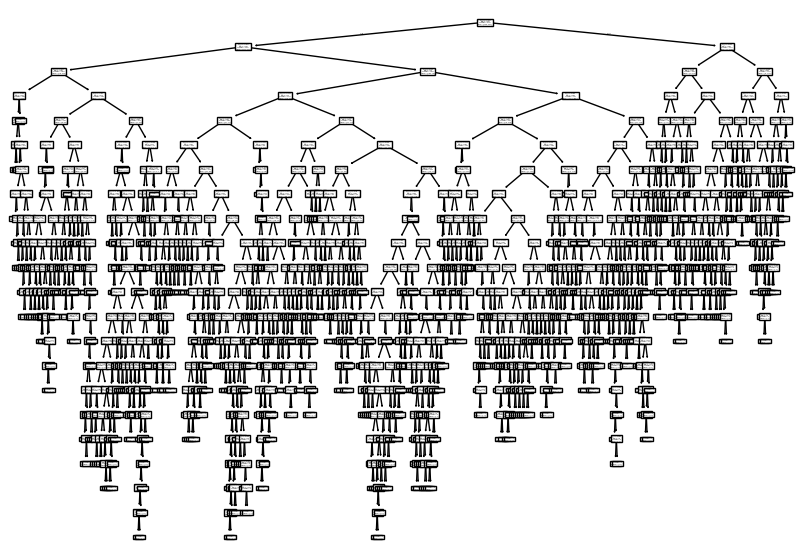

In [45]:
#결정트리 그림그리기
import matplotlib.pyplot as plt #건설사 데려오기
from sklearn.tree import plot_tree #건축 설계사 데려오기
plt.figure(figsize=(10,7)) #건설사에 땅의 면적 알려주기
plot_tree(dt) #설계사가 도면 그리기
plt.show( ) #건설사가 도면대로 집 짓기

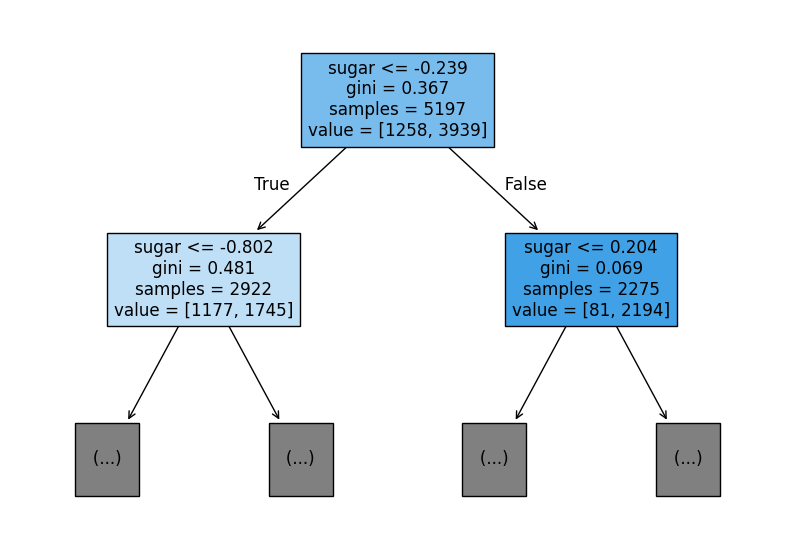

In [46]:
plt.figure(figsize=(10,7)) #건설사에 땅의 면적 알려주기
plot_tree(dt, max_depth=1, filled=True, 
          feature_names=['alcohol', 'sugar', 'pH']) #max_depth=1: 깊이 1까지만 / filled=True: 색칠 / feature_names: 특성 이름 표시
plt.show( ) #건설사가 도면대로 집 짓기

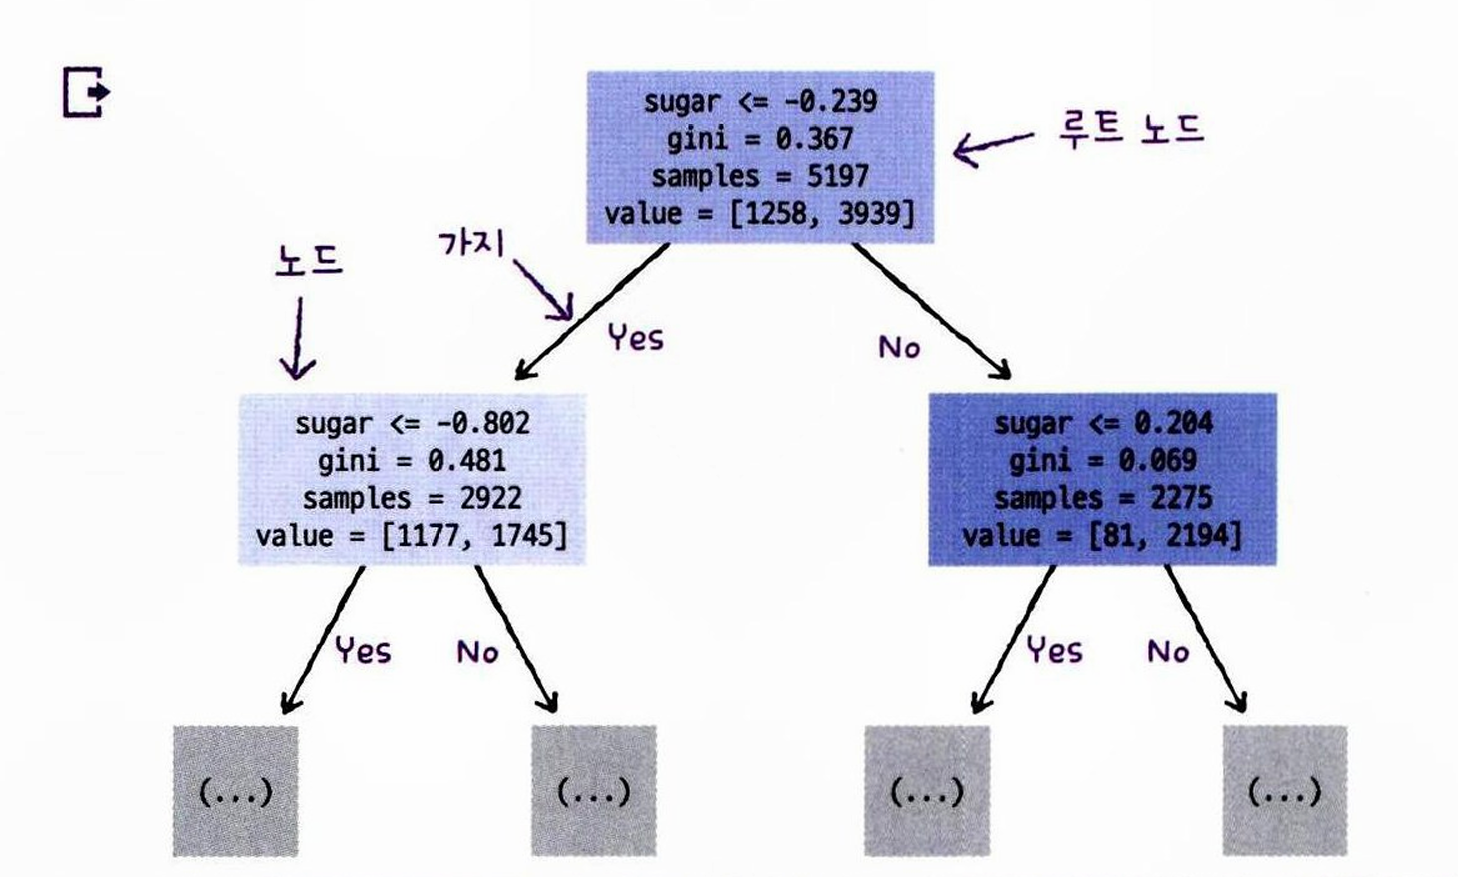

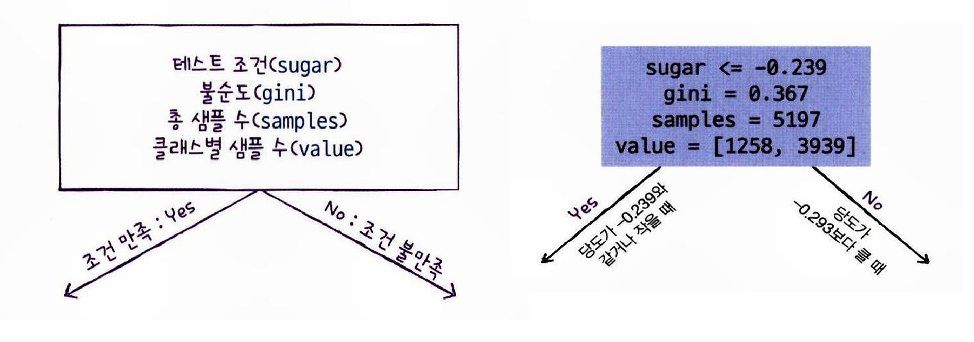


* sugar 가 <= -0.239 면 왼쪽 아래로 이동 아니면 오른쪽 아래로 이동  
-------------

### 노드의 색
색이 진할 수록 한 클래스의 비율이 높다는 뜻  

## 불순도
gini = Gini impurity 지니 불순도  
 
DecisionTreeClassifier 클래스의 criterion 매개변수 기본값 = gini    
 데이터 분할 기준을 정하는 것

*지니 불순도 = 1 — (음성 클래스 비율^2 + 양성 클래스 비율^2)*  

**루트 노드에서 gini**    
- 총 5197개 샘플, 음성 1258개, 양성 3939개   
- gini = 1- ((1258 / 5197)^2 + (3939/5197)^2)  = 0.367  

**왼쪽 노드에서 gini**
- 총 2922개 샘플, 음성 1177개, 양성 1745개   
- gini = 1-((1177/2922)^2 + (1745/2922)^2) = 0.481  

**gini 수치의 의미**
- 0 : 완전 순수 (한 클래스만 있음) = 최적  
- 0.5 : 완전히 섞임 (두 클래스가 반반) = 불순  
- 높음 : 클래스가 더 섞여 있음 = 불순도가 매우 큼  

>> gini가 높다면 계속 결정 트리를 분할해서 gini를 최소화시킴  


----------------
### 정보 이득 = 부모 노드와 자식 노드 사이의 불순도 차이
*부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수) * 왼쪽 노드 불슨도 - (오른쪽 노드 샘플 수/부모 샘플 수) * 오른쪽 노드 불순도*    
결정 트리 알고리즘은 정보 이득이 최대화 되도록 학습.

**위 결정트리에서 정보이득**
0.367 - (292/5197) * 0.481 - (2275/5197) * 0.069 = 0.066  


-----------

### DecisionTreeClassifier 클래스에서의 불순도 기준

`Criterion = 'entropy'` 를 지정하여 엔트로피 불순도 사용할 수 있음.  

*음성 클래스 비율 * log2(음성 클래스 비율) - 양성 클래스 비율 * log2(양성 클래스 비율)*  

**위 결정트리에서 루트 노드의 엔트로피 불순도**
-(1258 / 5197) * log2(1258 / 5197) - (3939/5197) * log2(3939/5197) = 0.798  


## Gini vs Entropy
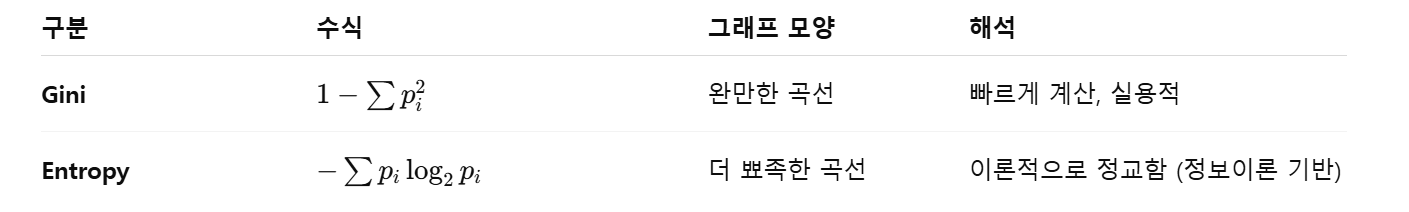
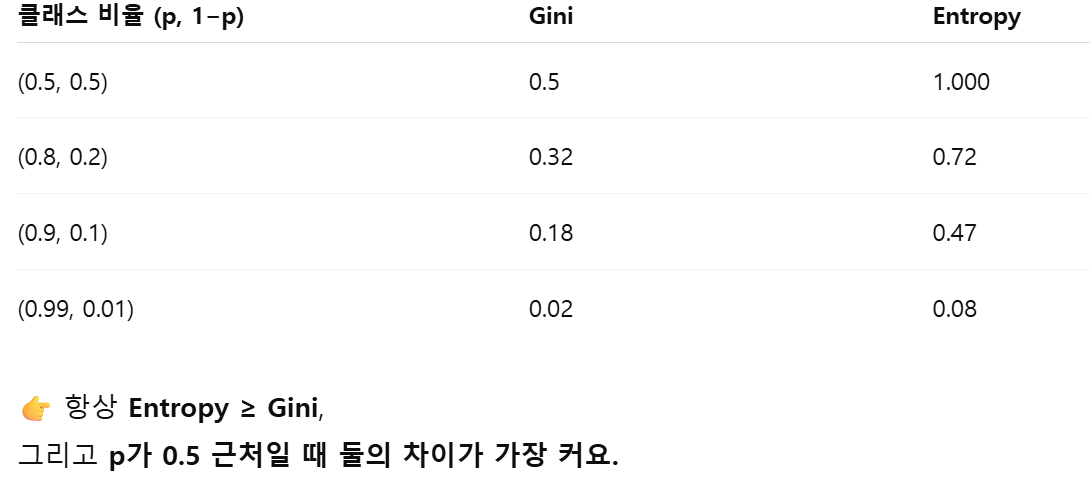

🎯 왜 차이가 나는가  
**Gini는 단순히 "섞임의 비율"을 제곱으로 평균낸 값**  
즉, “한 번 더 제곱”하기 때문에 큰 쪽(주류 클래스)의 비중을 더 크게 반영해요.  
→ 그래서 “덜 섞인 노드”에서는 더 작은 수치를 보여줍니다.  

**Entropy는 정보이론 관점에서 “불확실성”을 계산**  
로그를 사용해서 작은 확률에도 민감하게 반응합니다.  
→ 즉, “조금이라도 섞이면 불확실성이 크다”고 더 크게 잡아요.  
→ 따라서 Gini보다 항상 더 큰 수치가 나옵니다.  
 
* 둘다 “불순하다”는 뜻은 같지만,  
엔트로피는 “정보 손실” 관점에서 더 세밀하게 섞임을 평가하므로 수치가 큽니다.  
(즉, 더 엄격하게 본다고 생각하면 돼요.)  


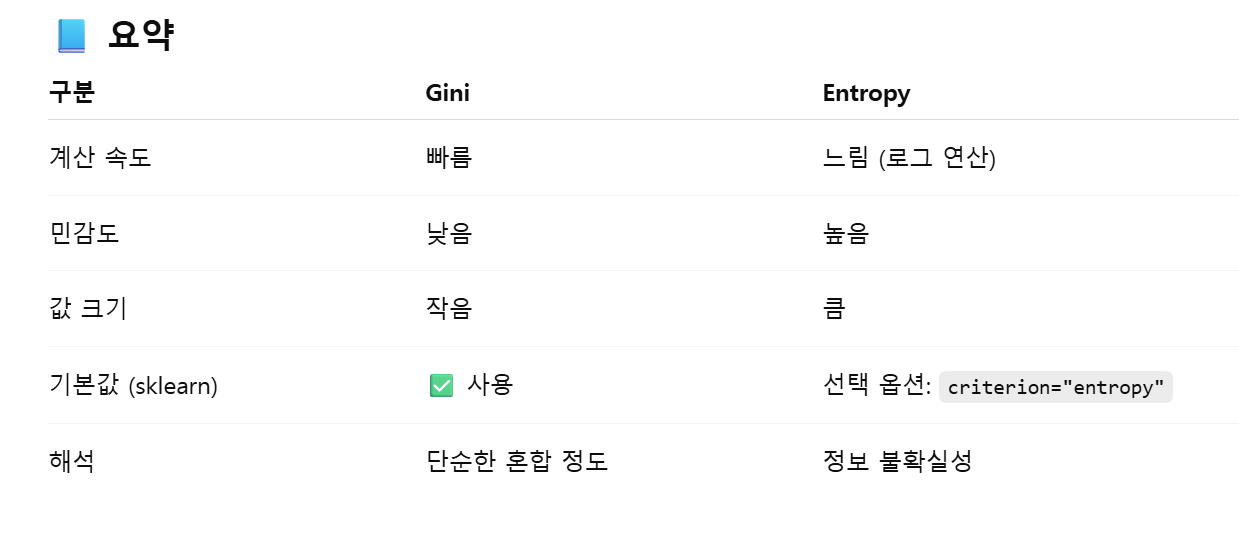


## 1.2. 가지치기

가지치기의 가장 간단한 방법
**트리의 최대 깊이 지정하기**


In [47]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) #깊이 3으로 지정
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


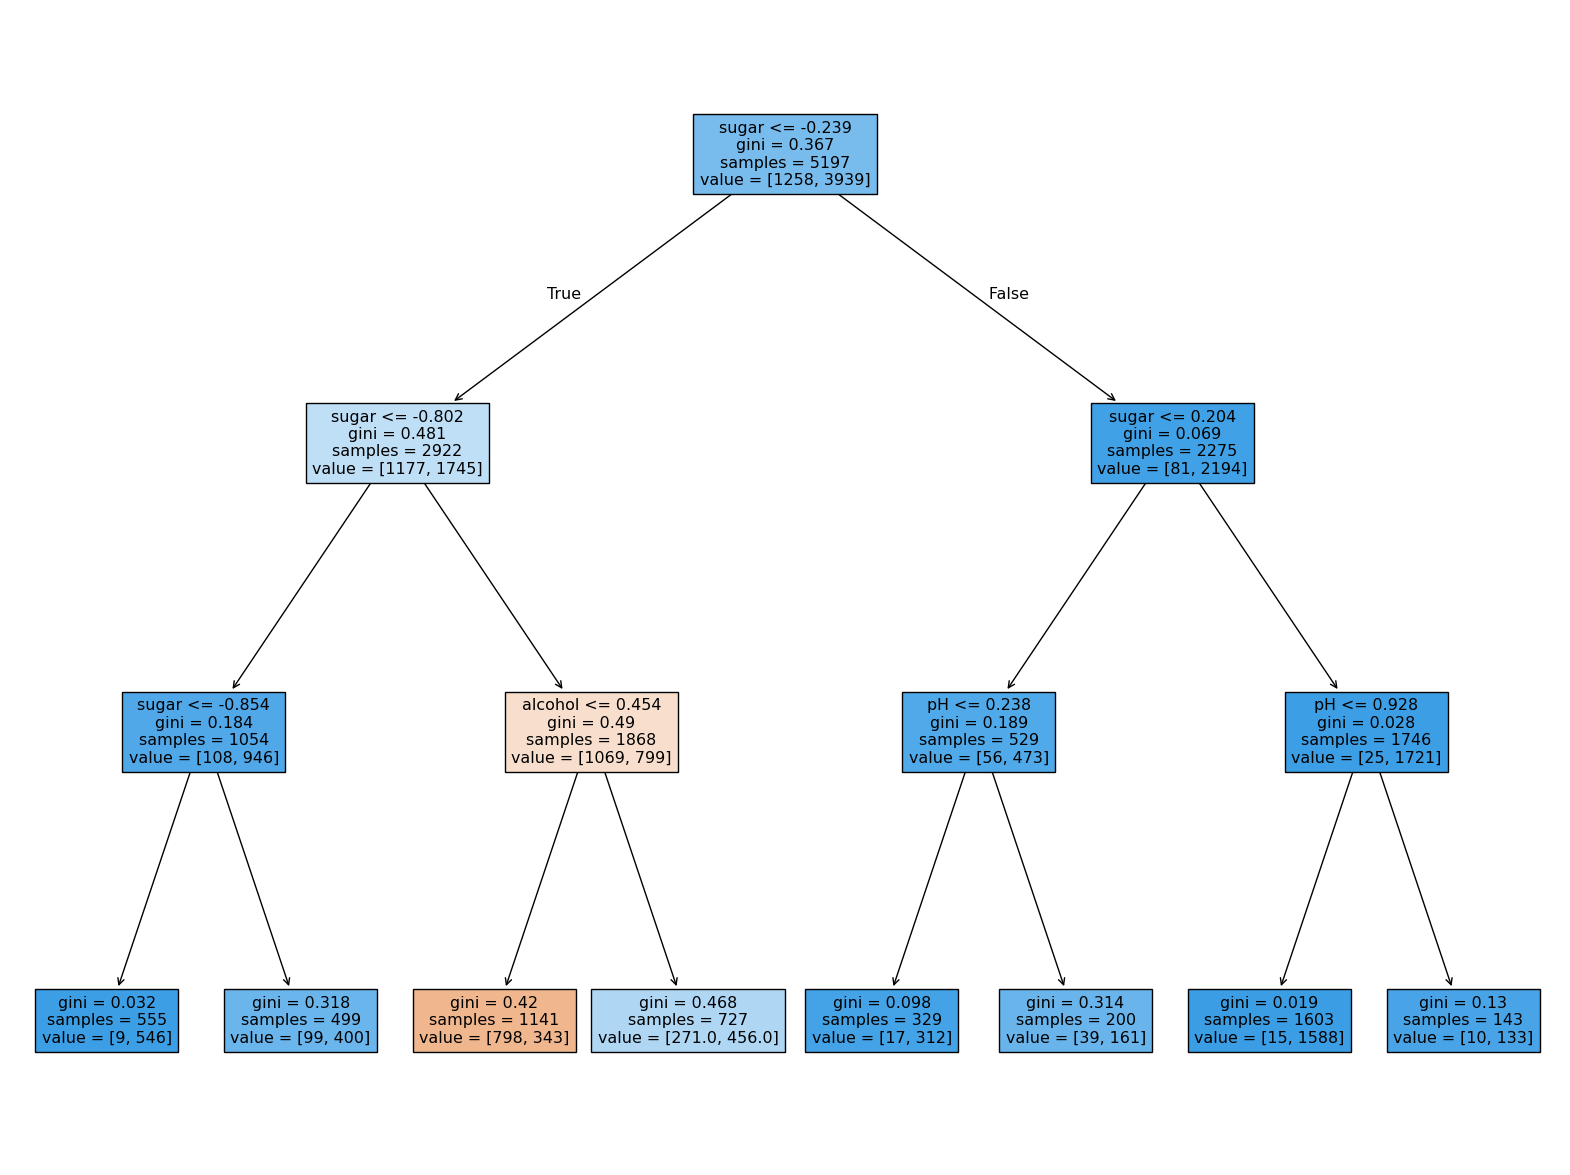

In [48]:
# 결정트리 그림 그리기
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show( ) 

* depth 1 = sugar 기준
* depth 2 . 1 = sugar 기준
* depth 2 . 2 = alcohol 기준
* depth 2 . 3, 4 = pH 기준
* depth 3 = 최종 리프 노드  
        - 세번째 노드만 음성 (레드와인)으로 예측
        -  즉 당도가 -0.802보다 크고 -0.239보다 작은 와인 중에 알코올 도수가 0.454와 같거나 작은 것이 레드 와인


***결정 트리는 클래스별 비율로 표준화 하지 않아도 된다***


In [49]:
#표준화 하지 않은 데이터로 결정트리 모델 훈련 및 점수 출력
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target) #표준화 하지 않은 훈련 세트로 결정트리 모델 훈련
print(dt.score(train_input, train_target)) #훈련 세트 점수 출력
print(dt.score(test_input, test_target)) #테스트 세트 점수 출력



0.8454877814123533
0.8415384615384616


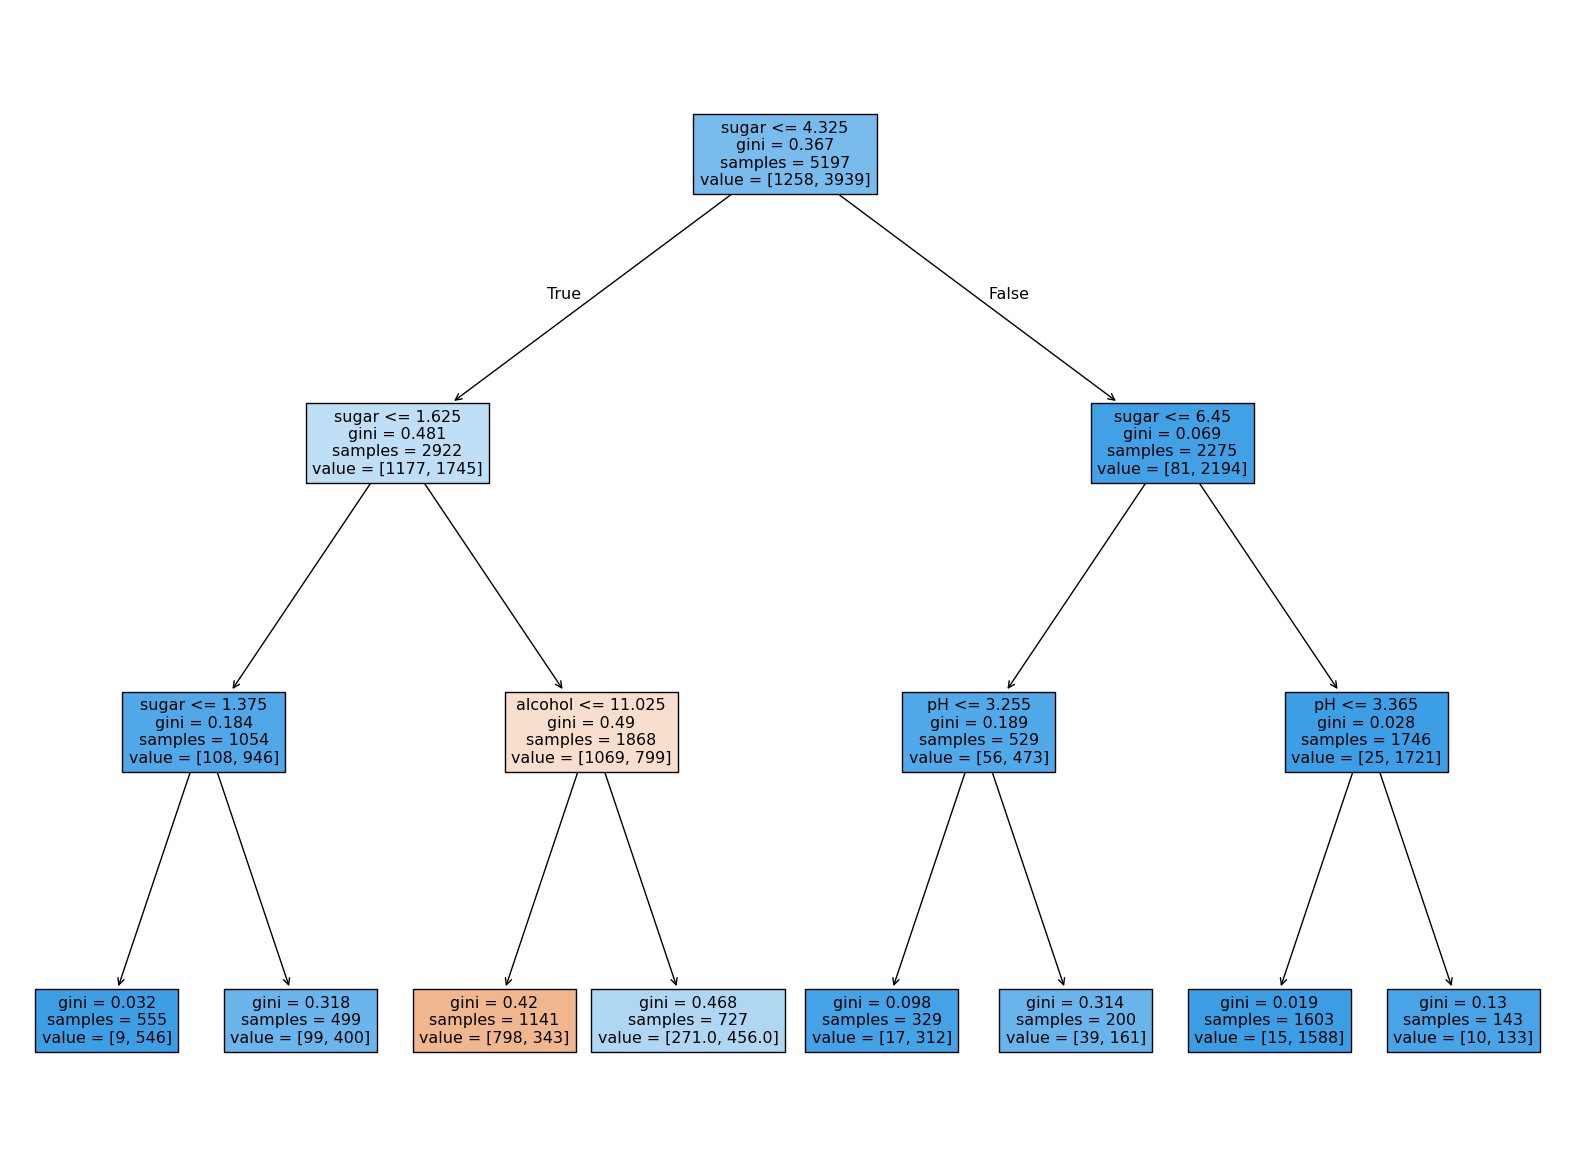

In [54]:
# 결정트리 그리기
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show( )

당도가 1.625보다 크고 4.325보다 작은 와인 중에 알코올 도수가 11.025와 같거나 작은 것이 레드 와인임을 알 수 있음.

**특성의 중요도는 어떻게 결정?**
위 결정트리에서는 sugar을 depth1에서 사용하였으므로 sugar가 가장 중요한 특성인 것 같음.

특성 중요도 = feature_importances_ 속성에 저장되어 있음.

In [55]:
#속성 중요도 출력
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


두 번째 특성인 sugar가 가장 높은 숫자 = sugar 가 가장 중요한 특성